# Chapter 06 비지도 학습
- 타깃이 없는 데이터를 사용하는 비지도 학습과 대표적인 알고리즘
- 대표적인 군집 알고리즘인 k-평균
- 대표적인 차원 축소 알고리즘인 주성분 분석(PCA)

## 6-3 주성분 분석
- 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석)모델을 만들어 봄

### 차원과 차원의 축소
- dimension reduction(차원 축소)    
    -> 저장 공간을 절약하기 위해서

### 주성분 분석(Principal component analysis)
- 주성분 (분산이 커지는 방향)

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

--2023-09-11 02:08:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-09-11 02:08:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-09-11 02:08:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


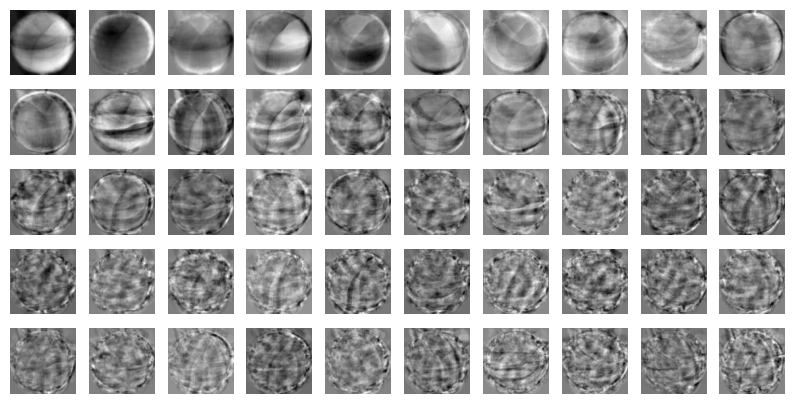

In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
    n=len(arr)
    rows=int(np.ceil(n/10))
    cols=n if rows<2 else 10
    fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n:
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()
draw_fruits(pca.components_.reshape(-1,100,100))

In [5]:
print(fruits_2d.shape)

(300, 10000)


In [6]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


### 원본 데이터 재구성

In [7]:
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


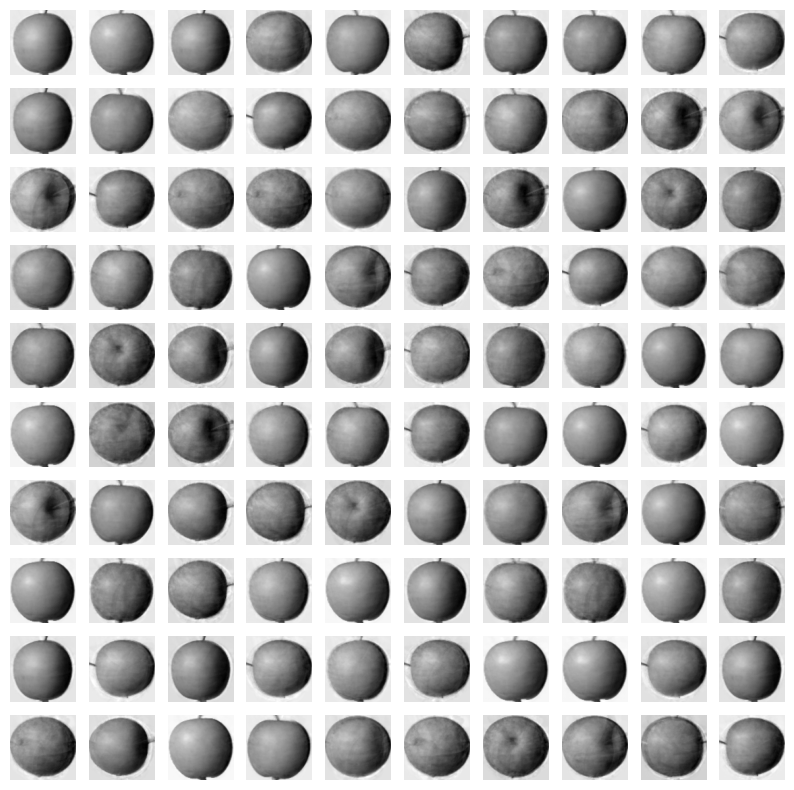

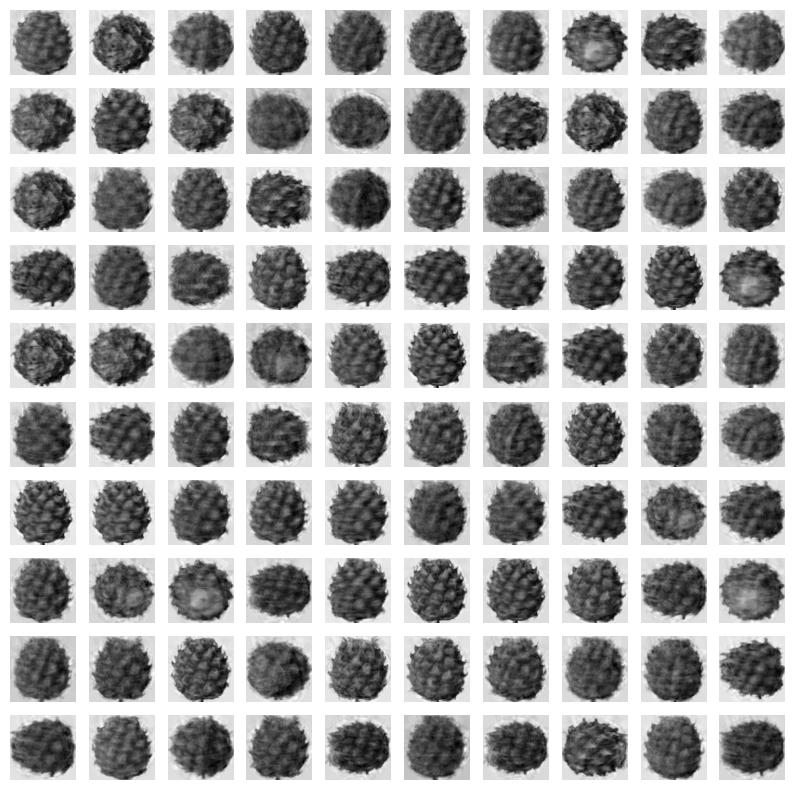

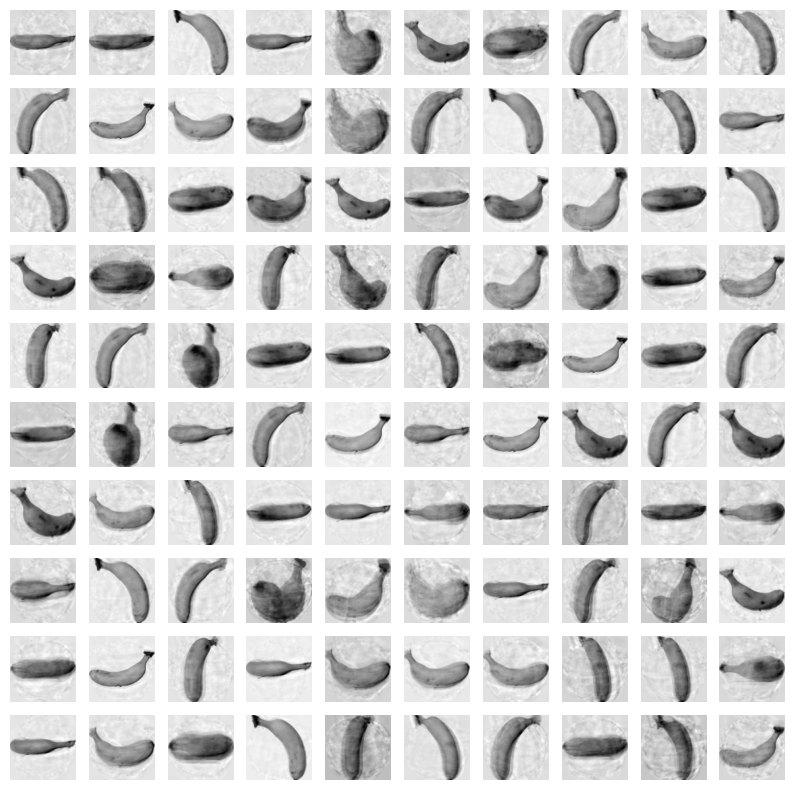

In [8]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

### 설명된 분산
- explained variance(설명된 분산) : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [9]:
print(np.sum(pca.explained_variance_ratio_))

0.9215556424812578


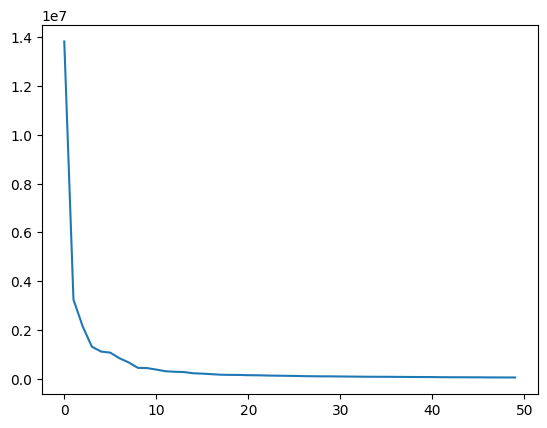

In [10]:
plt.plot(pca.explained_variance_)
plt.show()

### 다른 알고리즘 함께 사용하기

In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [12]:
target=np.array([0]*100+[1]*100+[2]*100)

In [13]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.5324607372283934


In [14]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02563962936401367


In [15]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
print(pca.n_components_)

2


In [18]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [19]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.030550670623779298


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [21]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


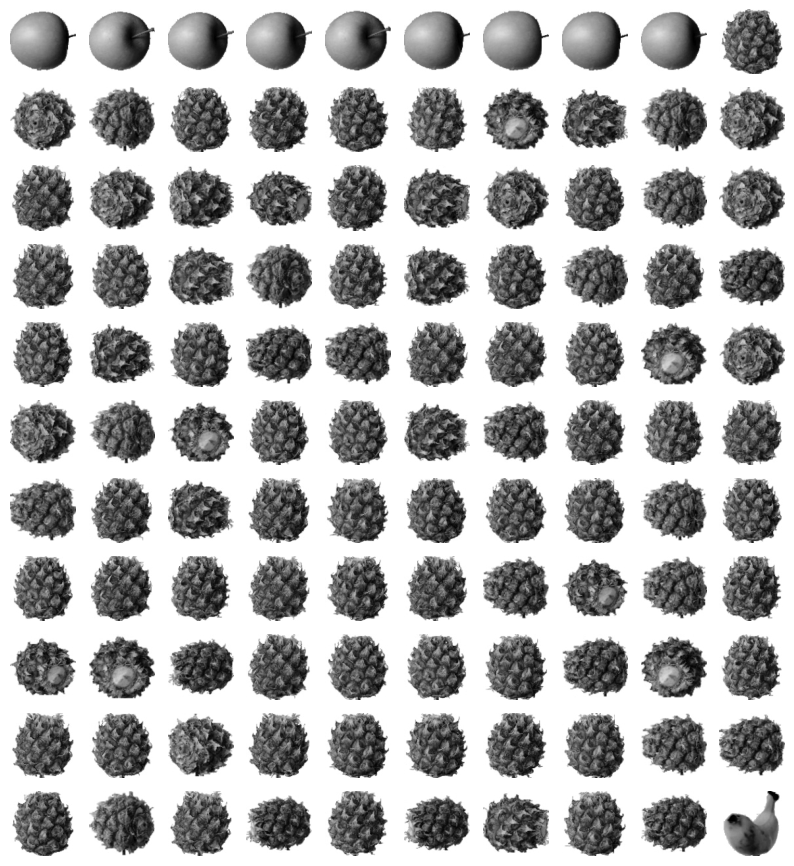

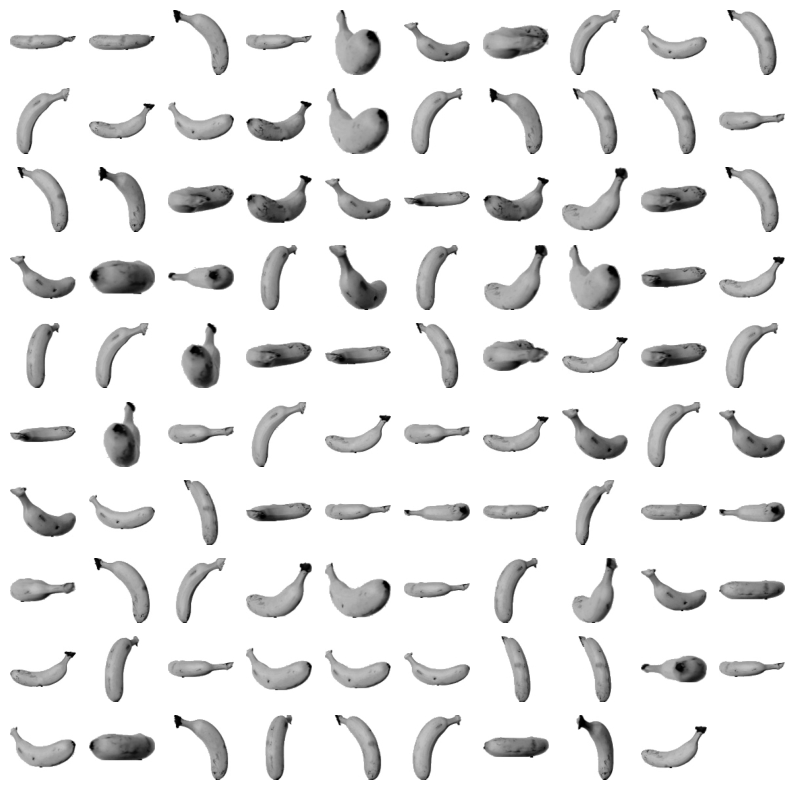

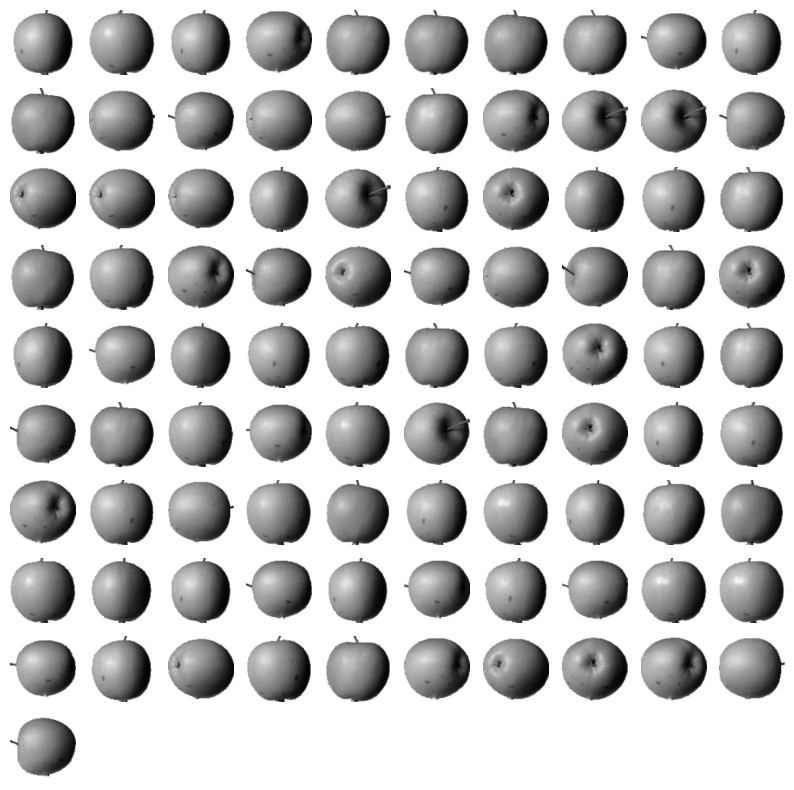

In [22]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

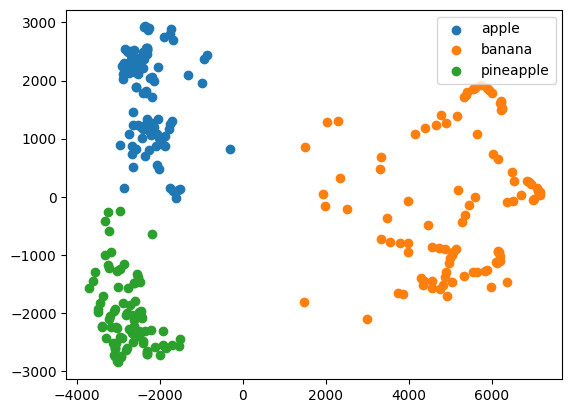

In [24]:
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

### 마무리
- `차원 축소` : 원본 데이터의 특성이 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류
- `주성분 분석` : 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수도 있음
- `설명된 분산` : 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지를 기록한 것